<a href="https://colab.research.google.com/github/M0n1ka-05/Cardiovascular_Risk_Prediction_Model/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cardiovascular Risk Prediction**

**Problem Description:**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.


**Data Description:**



**Independent Features:**

• Sex: male or female("M" or "F") 

• Age: Age of the patient 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day 

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous) 

• Glucose: glucose level (Continuous) 

**Target Variable:**

• TenYearCHD (binary: “1”, means “Yes”, “0” means “No”)


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#Load Dataset
file1 = ('/content/drive/MyDrive/AlmaBetter/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')
df= pd.read_csv(file1)

In [45]:
#Dividing dataset into training and testing set:
X_train, X_test = train_test_split(df, test_size=0.20, random_state=1)

In [46]:
train_df=pd.DataFrame(X_train, columns=['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']) 

In [47]:
test_df=pd.DataFrame(X_test, columns=['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']) 

After split, we made two different dataframe, one is testing and other is training. We will keep our testing set untouched and will perform our EDA on training set.




In [48]:
train_df.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
303,303,63,1.0,F,NO,0.0,0.0,0,0,0,222.0,146.0,78.0,16.92,65.0,74.0,1
1435,1435,61,2.0,F,NO,0.0,0.0,0,1,0,194.0,148.0,89.0,23.48,100.0,101.0,0
675,675,49,2.0,M,YES,50.0,0.0,0,0,0,252.0,156.0,91.0,25.35,70.0,114.0,1


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 303 to 1061
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2712 non-null   int64  
 1   age              2712 non-null   int64  
 2   education        2645 non-null   float64
 3   sex              2712 non-null   object 
 4   is_smoking       2712 non-null   object 
 5   cigsPerDay       2695 non-null   float64
 6   BPMeds           2678 non-null   float64
 7   prevalentStroke  2712 non-null   int64  
 8   prevalentHyp     2712 non-null   int64  
 9   diabetes         2712 non-null   int64  
 10  totChol          2684 non-null   float64
 11  sysBP            2712 non-null   float64
 12  diaBP            2712 non-null   float64
 13  BMI              2701 non-null   float64
 14  heartRate        2711 non-null   float64
 15  glucose          2485 non-null   float64
 16  TenYearCHD       2712 non-null   int64  
dtypes: float64(9

In [50]:
train_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2712.000000,2712.000000,2645.000000,2695.000000,2678.000000,2712.000000,2712.000000,2712.000000,2684.000000,2712.000000,2712.000000,2701.000000,2711.000000,2485.000000,2712.000000
mean,1701.139381,49.569322,1.961815,8.983302,0.031367,0.006637,0.316372,0.023599,237.638599,132.538717,82.840708,25.807775,75.907783,81.658350,0.152655
std,976.339561,8.595096,1.022653,11.841101,0.174339,0.081213,0.465146,0.151824,45.475864,21.913813,11.962373,4.124119,11.889171,22.193456,0.359721
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,849.750000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.050000,68.000000,71.000000,0.000000
50%,1704.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,129.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2547.250000,56.250000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,136.000000,56.800000,143.000000,394.000000,1.000000


In [51]:
#dimension of dataset
train_df.shape

(2712, 17)

### **Exploratory Data Analysis**

**Independent Variable**

**Missing Value Imputation:**

In [52]:
#to get count of null values in train_df
train_df.isna().sum()

id                   0
age                  0
education           67
sex                  0
is_smoking           0
cigsPerDay          17
BPMeds              34
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             28
sysBP                0
diaBP                0
BMI                 11
heartRate            1
glucose            227
TenYearCHD           0
dtype: int64

In total , there are 6 fields having null values . We will analyze each of them and will use proper methods to handle null values.

**Education**

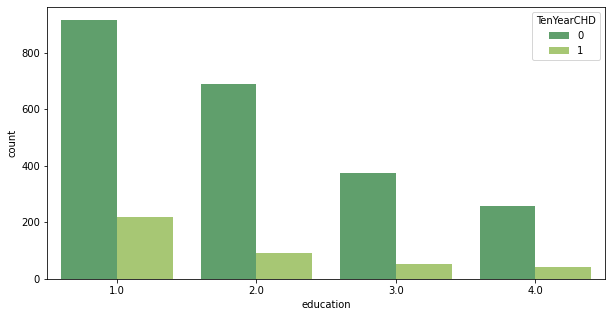

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='TenYearCHD',data=train_df, palette='summer')




> Education in genral does not have any corelation with heart diseases. So we can consider dropping this column as of now.



In [54]:
train_df.drop('education', axis=1, inplace=True) 

**cigsPerDay**

In [64]:
pd.crosstab(index=train_df['TenYearCHD'], columns=train_df['cigsPerDay'])

cigsPerDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,23.0,25.0,30.0,35.0,38.0,40.0,43.0,45.0,50.0,60.0,70.0
TenYearCHD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1191,33,11,60,6,77,9,5,6,78,69,3,2,2,1,112,1,5,3,1,398,3,26,114,9,1,36,23,2,4,6,1
1,190,6,2,9,0,9,1,3,0,7,13,1,1,0,0,24,0,0,2,0,88,1,7,23,3,0,15,7,0,1,1,0


In [57]:
train_df['cigsPerDay'] = train_df['cigsPerDay'].fillna(train_df['cigsPerDay'].median())

to impute misssing values for cigsPerDay we have used median. 

**BPMeds**

In [63]:
train_df['BPMeds'].value_counts()

0.0    2594
1.0      84
Name: BPMeds, dtype: int64

In [74]:
train_df.dropna(subset=['BPMeds'], inplace=True)

In [62]:
pd.crosstab(index=train_df['TenYearCHD'], columns=train_df['BPMeds'])


BPMeds,0.0,1.0
TenYearCHD,,
0,2211,58
1,383,26


**totChol**           

In [78]:
train_df['totChol'].value_counts()

240.0    49
210.0    48
220.0    42
260.0    39
232.0    38
         ..
336.0     1
600.0     1
464.0     1
356.0     1
321.0     1
Name: totChol, Length: 229, dtype: int64

**Sex**

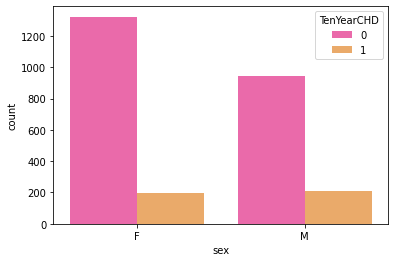

In [81]:
sns.countplot(x='sex',hue='TenYearCHD',data=train_df, palette='spring')

**is_smoking**

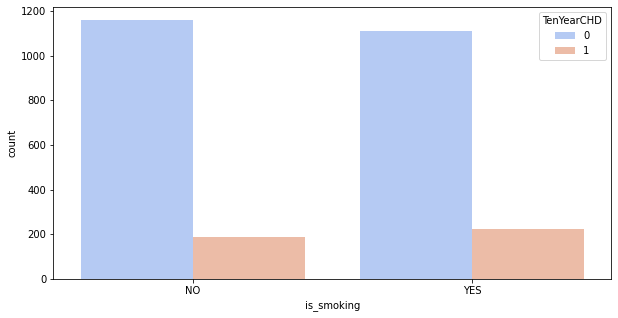

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(x='is_smoking',hue='TenYearCHD',data=train_df, palette='coolwarm')